## Pandas Tutorial
#### **Created by Louai Al Jabi**

(revised 1/30/22)

### Overview

In this tutorial you will be completing a tutorial on the pandas package. It will probably take from 3-4 hours to complete the pandas tutorial, so I recommend starting early and completing the tutorial over multiple work sessions.

### Details

Before beginning the tutorial you should make sure that the following packages are installed in your python environment:  
`pandas requests matplotlib`  

You can use the `conda list` or `pip list` commands to list the packages in your environment. If there are too many packages to see on one page of output in your terminal you can pipe the result of the command to the `less` pager:  

```
conda list | less
```

This displays output one "page" at a time. In the `less` pager you use the space bar to advance by a page in the output, `b` to go back by a page, and `q` to quit. You can also use the arrow keys to go backward or forward one line at a time.

#### As you work through the tutorial do the following

* Read the tutorial text carefully. The text explains a lot of important concepts about pandas and about the code examples

# Pandas 

### Using Pandas and Python to explore dataset
* Do you have a large dataset that’s full of interesting insights, but you’re not sure where to start exploring it? Has your boss asked you to generate some statistics from it, but they’re not so easy to extract? These are precisely the use cases where Pandas and Python can help you! With these tools, you’ll be able to slice a large dataset down into manageable parts and glean insight from that information.

**In this tutorial, you will learn:**
* **Calculate** metrics about your data
* **Perform** basic queries and aggregations
* **Discover** and handle incorrect data, inconsistencies, and missing values
* **Visualize** your data with plots

### Using the Pandas Python Library

* It’s time to have a look at a dataset. In this tutorial, you’ll analyze NBA results provided by FiveThirtyEight in a 17MB CSV file. Create a script download_nba_all_elo.py to download the data:

In [1]:
import requests

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
response.raise_for_status()    # Check that the request was successful
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("Download ready.")

Download ready.


* When you execute the script, it will save the file nba_all_elo.csv in your current working directory.
* Now you can use the Pandas Python library to take a look at your data.
* Use `.read_csv()` to read in your dataset and store it as a DataFrame object in the variable nba:

In [2]:
import pandas as pd
# Here, you follow the convention of importing Pandas in Python with the pd alias

nba = pd.read_csv("nba_all_elo.csv")
type(nba)

pandas.core.frame.DataFrame

In [4]:
# You can see how much data nba contains:
print(len(nba))
print(nba.shape)

126314
(126314, 23)


* You use the Python built-in function `len()` to determine the number of rows. You also use the `.shape` attribute of the DataFrame to see its **dimensionality**. The result is a tuple containing the number of rows and columns.
* Now you know that there are 126,314 rows and 23 columns in your dataset. But how can you be sure the dataset really contains basketball stats? You can have a look at the first five rows with `.head()`:

In [5]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


* If you’re following along with a Jupyter notebook, then you’ll see a result like this:

![df1](https://files.realpython.com/media/head.7c86dafd4141.png)

* Unless your screen is quite large, your output probably won’t display all 23 columns. Somewhere in the middle, you’ll see a column of ellipses (...) indicating the missing data. If you’re working in a terminal, then that’s probably more readable than wrapping long rows. However, Jupyter notebooks will allow you to scroll. You can configure Pandas to display all 23 columns like this:

In [6]:
pd.set_option("display.max.columns", None)

* While it’s practical to see all the columns, you probably won’t need six decimal places! Change it to two:

In [7]:
pd.set_option("display.precision", 2)

* To verify that you’ve changed the options successfully, you can execute `.head()` again, or you can display the last five rows with `.tail()` instead:

In [8]:
# Now, you should see all the columns, and your data should show two decimal places:

nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


* You can discover some further possibilities of `.head()` and `.tail()` with a small exercise. Can you print the last three lines of your DataFrame? Expand the code block below to see the solution:


In [9]:
# You can see the last three lines of your dataset with the options you’ve set!

nba.tail(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


* Similar to the Python standard library, functions in Pandas also come with several optional parameters. Whenever you bump into an example that looks relevant but is slightly different from your use case, check out the [official documentation](https://pandas.pydata.org/pandas-docs/stable/). The chances are good that you’ll find a solution by tweaking some optional parameters!

### Getting to Know Your Data

* You’ve imported a CSV file with the Pandas Python library and had a first look at the contents of your dataset. So far, you’ve only seen the size of your dataset and its first and last few rows. Next, you’ll learn how to **examine your data** more systematically.

#### Displaying Data Types
* The first step in getting to know your data is to discover the different [data types](https://realpython.com/python-data-types/) it contains. While you can put anything into a list, the columns of a DataFrame contain values of a specific data type. When you compare Pandas and Python data structures, you’ll see that this behavior makes Pandas much faster!
* You can display all columns and their data types with `.info()`:

In [10]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

* You’ll see a list of all the columns in your dataset and the type of data each column contains. Here, you can see the data types int64, float64, and object. Pandas uses the [NumPy](https://realpython.com/numpy-array-programming/) library to work with these types. Later, you’ll meet the more complex categorical data type, which the Pandas Python library implements itself.
* The object data type is a special one. According to the Pandas Cookbook, the object data type is “a catch-all for columns that Pandas doesn’t recognize as any other specific type.” In practice, it often means that all of the values in the column are strings.
* Although you can store arbitrary Python objects in the object data type, you should be aware of the drawbacks to doing so. Strange values in an object column can harm Pandas’ performance and its interoperability with other libraries. For more information, check out the official getting started guide.
#### Showing Basics Statistics
* Now that you’ve seen what data types are in your dataset, it’s time to get an overview of the values each column contains. You can do this with `.describe()`:

In [12]:
# This function shows you some basic descriptive statistics for all numeric columns:


nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


* `.describe()` only analyzes numeric columns by default, but you can provide other data types if you use the include parameter:

In [13]:
import numpy as np
nba.describe(include=object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,194611010TRH,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


* `.describe()` won’t try to calculate a mean or a standard deviation for the object columns, since they mostly include text strings. However, it will still display some descriptive statistics.
* Take a look at the team_id and fran_id columns. Your dataset contains 104 different team IDs, but only 53 different franchise IDs. Furthermore, the most frequent team ID is BOS, but the most frequent franchise ID Lakers. How is that possible? You’ll need to explore your dataset a bit more to answer this question.

### Exploring Your Dataset

* **Exploratory data analysis** can help you answer questions about your dataset. For example, you can examine how often specific values occur in a column:

In [14]:
nba["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
INJ      60
PIT      60
DTF      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [15]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

* It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. Find out who the other "Lakers" team is:

In [16]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

* Indeed, the Minneapolis Lakers ("MNL") played 946 games. You can even find out when they played those games. For that, you’ll first define a column that converts the value of date_game to the datetime data type. Then you can use the min and max aggregate functions, to find the first and last games of Minneapolis Lakers:

In [17]:
nba["date_played"] = pd.to_datetime(nba["date_game"])
nba.loc[nba["team_id"] == "MNL", "date_played"].min()

Timestamp('1948-11-04 00:00:00')

In [18]:
nba.loc[nba['team_id'] == 'MNL', 'date_played'].max()

Timestamp('1960-03-26 00:00:00')

In [19]:
nba.loc[nba["team_id"] == "MNL", "date_played"].agg(("min", "max"))

min   1948-11-04
max   1960-03-26
Name: date_played, dtype: datetime64[ns]

* It looks like the Minneapolis Lakers played between the years of 1948 and 1960. That explains why you might not recognize this team!

* You’ve also found out why the Boston Celtics team "BOS" played the most games in the dataset. Let’s analyze their history also a little bit. Find out how many points the Boston Celtics have scored during all matches contained in this dataset. Expand the code block below for the solution:

In [20]:
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

* You’ve got a taste for the capabilities of a Pandas DataFrame. In the following sections, you’ll expand on the techniques you’ve just used, but first, you’ll zoom in and learn how this powerful data structure works.

### Getting to Know Pandas’ Data Structures
* While a DataFrame provides functions that can feel quite intuitive, the underlying concepts are a bit trickier to understand. For this reason, you’ll set aside the vast NBA DataFrame and build some smaller Pandas objects from scratch.
#### Understanding Series Objects
* Python’s most basic data structure is the list, which is also a good starting point for getting to know **pandas.Series** objects. Create a new Series object based on a list:

In [21]:
revenues = pd.Series([5555, 7000, 1980])
revenues

0    5555
1    7000
2    1980
dtype: int64

* You’ve used the list [5555, 7000, 1980] to create a Series object called revenues. A Series object wraps two components:
    * A sequence of **values**
    * A sequence of **identifiers**, which is the index
* You can access these components with `.values` and `.index`, respectively:

In [22]:
# revenues.values returns the values in the Series, whereas revenues.index returns 
# the positional index.
revenues.values

array([5555, 7000, 1980])

In [23]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

* While Pandas builds on `NumPy`, a significant difference is in their **indexing**. Just like a NumPy array, a Pandas Series also has an integer index that’s implicitly defined. This implicit index indicates the element’s position in the Series.
* However, a Series can also have an arbitrary type of index. You can think of this explicit index as labels for a specific row:

In [24]:
city_revenues = pd.Series(
[4200, 8000, 6500],
index=["Amsterdam", "Toronto", "Tokyo"]
)

city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

* Here, the index is a list of city names represented by strings. You may have noticed that Python dictionaries use string indices as well, and this is a handy analogy to keep in mind! You can use the code blocks above to distinguish between two types of Series:
    * **revenues:** This Series behaves like a Python list because it only has a positional index.
    * **city_revenues:** This Series acts like a Python dictionary because it features both positional and a label index.
* Here’s how to construct a Series with a label index from a Python dictionary:



In [25]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

* The dictionary keys become the index, and the dictionary values are the Series values.
* Just like dictionaries, Series also support `.keys()` and the in keyword:

In [26]:
city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [27]:
# You can use these methods to answer questions about your dataset quickly.
"Tokyo" in city_employee_count

True

In [28]:
"New York" in city_employee_count

False

### Understanding DataFrame Objects
* While a Series is a pretty powerful data structure, it has its limitations. For example, you can only store one attribute per key. As you’ve seen with the nba dataset, which features 23 columns, the Pandas Python library has more to offer with its DataFrame. This data structure is a sequence of Series objects that share the same index.
* If you’ve followed along with the Series examples, then you should already have two Series objects with cities as keys:
    * city_revenues
    * city_employee_count
* You can combine these objects into a DataFrame by providing a dictionary in the constructor. The dictionary keys will become the column names, and the values should contain the Series objects:

In [29]:
city_data = pd.DataFrame({
"revenue": city_revenues,
"employee_count": city_employee_count
})

city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN


* Note how Pandas replaced the missing employee_count value for Toronto with NaN.
* The new DataFrame index is the union of the two Series indices:

In [30]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [31]:
# Just like a Series, a DataFrame also stores its values in a NumPy array:
city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [32]:
# You can also refer to the 2 dimensions of a DataFrame as axes:
city_data.axes

[Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object'),
 Index(['revenue', 'employee_count'], dtype='object')]

In [33]:
city_data.axes[0]

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [34]:
city_data.axes[1]

Index(['revenue', 'employee_count'], dtype='object')

* The axis marked with 0 is the row index, and the axis marked with 1 is the column index. This terminology is important to know because you’ll encounter several DataFrame methods that accept an axis parameter.
* A DataFrame is also a dictionary-like data structure, so it also supports `.keys()` and the in keyword. However, for a DataFrame these don’t relate to the index, but to the columns:

In [35]:
city_data.keys()

Index(['revenue', 'employee_count'], dtype='object')

In [36]:
"Amsterdam" in city_data

False

In [37]:
"revenue" in city_data

True

* You can see these concepts in action with the bigger NBA dataset. Does it contain a column called "points", or was it called "pts"? To answer this question, display the index and the axes of the nba dataset, then expand the code block below for the solution:
*  Because you didn’t specify an index column when you read in the CSV file, Pandas has assigned a RangeIndex to the DataFrame:

In [38]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

In [39]:
# nba, like all DataFrame objects, has two axes:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes',
        'date_played'],
       dtype='object')]

In [40]:
# You can check the existence of a column with .keys():
"points" in nba.keys()

False

In [41]:
# The column is called "pts", not "points".
"pts" in nba.keys()

True

* As you use these methods to answer questions about your dataset, be sure to keep in mind whether you’re working with a Series or a DataFrame so that your interpretation is accurate.
### Accessing Series Elements
* In the section above, you’ve created a Pandas Series based on a Python list and compared the two data structures. You’ve seen how a Series object is similar to lists and dictionaries in several ways. A further similarity is that you can use the **indexing operator ([])** for Series as well.
* You’ll also learn how to use two Pandas-specific access methods:
    * .loc
    * .iloc
* You’ll see that these data access methods can be much more readable than the indexing operator.
#### Using the Indexing Operator
* Recall that a Series has two indices:
    * A positional or implicit index, which is always a RangeIndex
    * A label or explicit index, which can contain any hashable objects
* Next, revisit the city_revenues object:

In [42]:
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

* You can conveniently access the values in a Series with both the label and positional indices:

In [43]:
city_revenues["Toronto"]

8000

In [44]:
city_revenues[1]

8000

* You can also use negative indices and slices, just like you would for a list:

In [45]:
city_revenues[-1]

6500

In [46]:
city_revenues[1:]

Toronto    8000
Tokyo      6500
dtype: int64

In [47]:
city_revenues["Toronto":]

Toronto    8000
Tokyo      6500
dtype: int64

* If you want to learn more about the possibilities of the indexing operator, then check out [Lists and Tuples in Python](https://realpython.com/python-lists-tuples/).

### Using .loc and .iloc
* The indexing operator `([])` is convenient, but there’s a caveat. What if the labels are also numbers? Say you have to work with a Series object like this:

In [48]:
colors = pd.Series(
["red", "purple", "blue", "green", "yellow"],
index=[1, 2, 3, 5, 8]
)

colors

1       red
2    purple
3      blue
5     green
8    yellow
dtype: object

* What will `colors[1]` return? For a positional index, `colors[1]` is "purple". However, if you go by the label index, then `colors[1]` is referring to "red".
* The good news is, you don’t have to figure it out! Instead, to avoid confusion, the Pandas Python library provides two data access methods:
    * .loc refers to the label index.
    * .iloc refers to the positional index.
* These data access methods are much more readable:

In [49]:
colors.loc[1]

'red'

In [50]:
colors.iloc[1]

'purple'

* colors.loc[1] returned "red", the element with the label 1. colors.iloc[1] returned "purple", the element with the index 1.

* The following figure shows which elements .loc and .iloc refer to:

![](https://files.realpython.com/media/iloc_vs_loc_80_border20.d5280f475f4e.png)

* Again, `.loc` points to the label index on the right-hand side of the image. Meanwhile, .iloc points to the positional index on the left-hand side of the picture.

* It’s easier to keep in mind the distinction between `.loc` and `.iloc` than it is to figure out what the indexing operator will return. Even if you’re familiar with all the quirks of the indexing operator, it can be dangerous to assume that everybody who reads your code has internalized those rules as well!
* `.loc` and `.iloc` also support the features you would expect from indexing operators, like slicing. However, these data access methods have an important difference. While `.iloc` excludes the closing element, `.loc` includes it. Take a look at this code block:

In [51]:
# Return the elements with the implicit index: 1, 2
colors.iloc[1:3]

2    purple
3      blue
dtype: object

* If you compare this code with the image above, then you can see that colors`.iloc[1:3]` returns the elements with the positional indices of 1 and 2. The closing item "green" with a positional index of 3 is excluded.

* On the other hand, `.loc` includes the closing element:

In [52]:
# Return the elements with the explicit index between 3 and 8
colors.loc[3:8]

3      blue
5     green
8    yellow
dtype: object

* This code block says to return all elements with a label index between 3 and 8. Here, the closing item "yellow" has a label index of 8 and is included in the output.

* You can also pass a negative positional index to `.iloc`:

In [53]:
# You start from the end of the Series and return the second element.
colors.iloc[-2]

'green'

* You can use the code blocks above to distinguish between two Series behaviors:

    * You can use .iloc on a Series similar to using [] on a list.
    * You can use .loc on a Series similar to using [] on a dictionary.
* Be sure to keep these distinctions in mind as you access elements of your Series objects.
### Accessing DataFrame Elements
* Since a DataFrame consists of Series objects, you can use the very same tools to access its elements. The crucial difference is the additional **dimension** of the DataFrame. You’ll use the indexing operator for the columns and the access methods .loc and .iloc on the rows.
#### Using the Indexing Operator
* If you think of a DataFrame as a dictionary whose values are Series, then it makes sense that you can access its columns with the indexing operator:

In [54]:
 city_data["revenue"]

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

In [55]:
type(city_data["revenue"])

pandas.core.series.Series

* Here, you use the indexing operator to select the column labeled "revenue".

* If the column name is a string, then you can use attribute-style accessing with dot notation as well:

In [56]:
city_data.revenue

Amsterdam    4200
Tokyo        6500
Toronto      8000
Name: revenue, dtype: int64

* city_data["revenue"] and city_data.revenue return the same output.

* There’s one situation where accessing DataFrame elements with dot notation may not work or may lead to surprises. This is when a column name coincides with a DataFrame attribute or method name:

In [57]:
toys = pd.DataFrame([
{"name": "ball", "shape": "sphere"},
{"name": "Rubik's cube", "shape": "cube"}
])

toys["shape"]

0    sphere
1      cube
Name: shape, dtype: object

In [58]:
toys.shape

(2, 2)

* The indexing operation toys["shape"] returns the correct data, but the attribute-style operation toys.shape still returns the shape of the DataFrame. You should only use attribute-style accessing in interactive sessions or for read operations. You shouldn’t use it for production code or for manipulating data (such as defining new columns).

#### Using .loc and .iloc
* Similar to Series, a DataFrame also provides .loc and .iloc **data access methods**. Remember, .loc uses the label and .iloc the positional index:

In [59]:
city_data.loc["Amsterdam"]

revenue           4200.0
employee_count       5.0
Name: Amsterdam, dtype: float64

In [60]:
city_data.loc["Tokyo": "Toronto"]

,revenue,employee_count
Tokyo,6500,8.0
Toronto,8000,NaN


In [61]:
city_data.iloc[1]

revenue           6500.0
employee_count       8.0
Name: Tokyo, dtype: float64

* Each line of code selects a different row from city_data:

    * **city_data.loc["Amsterdam"]** selects the row with the label index "Amsterdam".
    * **city_data.loc["Tokyo": "Toronto"]** selects the rows with label indices from "Tokyo" to "Toronto". Remember, .loc is inclusive.
    * **city_data.iloc[1]** selects the row with the positional index 1, which is "Tokyo".
* Alright, you’ve used .loc and .iloc on small data structures. Now, it’s time to practice with something bigger! Use a data access method to display the second-to-last row of the nba dataset. Then, expand the code block below to see a solution:

In [62]:
# The second-to-last row is the row with the positional index of -2. You can 
# display it with .iloc:
nba.iloc[-2]

gameorder                      63157
game_id                 201506170CLE
lg_id                            NBA
_iscopy                            0
year_id                         2015
date_game                  6/16/2015
seasongame                       102
is_playoffs                        1
team_id                          CLE
fran_id                    Cavaliers
pts                               97
elo_i                        1700.74
elo_n                        1692.09
win_equiv                      59.29
opp_id                           GSW
opp_fran                    Warriors
opp_pts                          105
opp_elo_i                    1813.63
opp_elo_n                    1822.29
game_location                      H
game_result                        L
forecast                        0.48
notes                            NaN
date_played      2015-06-16 00:00:00
Name: 126312, dtype: object

* For a DataFrame, the data access methods .loc and .iloc also accept a second parameter. While the first parameter selects rows based on the indices, the second parameter selects the columns. You can use these parameters together to select a subset of rows and columns from your DataFrame:

In [63]:
city_data.loc["Amsterdam": "Tokyo", "revenue"]

Amsterdam    4200
Tokyo        6500
Name: revenue, dtype: int64

* Note that you separate the parameters with a comma (,). The first parameter, "Amsterdam" : "Tokyo," says to select all rows between those two labels. The second parameter comes after the comma and says to select the "revenue" column.

* It’s time to see the same construct in action with the bigger nba dataset. Select all games between the labels 5555 and 5559. You’re only interested in the names of the teams and the scores, so select those elements as well. Expand the code block below to see a solution:

In [64]:
# First, define which rows you want to see, then list the relevant columns:

nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


* You use .loc for the label index and a comma (,) to separate your two parameters.
* You should see a small part of your quite huge dataset.
* With data access methods like .loc and .iloc, you can select just the right subset of your DataFrame to help you answer questions about your dataset.

### Querying Your Dataset
* You’ve seen how to access subsets of a huge dataset based on its indices. Now, you’ll select rows based on the values in your dataset’s columns to `query` your data. For example, you can create a new DataFrame that contains only games played after 2010:

In [65]:
current_decade = nba[nba["year_id"] > 2010]
current_decade.shape

(12658, 24)

* You now have 24 columns, but your new DataFrame only consists of rows where the value in the "year_id" column is greater than 2010.

* You can also select the rows where a specific field is not null:

In [66]:
games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 24)

* This can be helpful if you want to avoid any missing values in a column. You can also use .notna() to achieve the same goal.

* You can even access values of the object data type as str and perform string methods on them:

In [67]:
ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 24)

* You use `.str.endswith()` to filter your dataset and find all games where the home team’s name ends with "ers".
* You can combine multiple criteria and query your dataset as well. To do this, be sure to put each one in parentheses and use the logical operators | and & to separate them.
* Do a search for Baltimore games where both teams scored over 100 points. In order to see each game only once, you’ll need to exclude duplicates:

In [68]:
nba[
(nba["_iscopy"] == 0) &
(nba["pts"] > 100) &
(nba["opp_pts"] > 100) &
(nba["team_id"] == "BLB")
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN,1949-02-26
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN,1953-01-10
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN,1953-01-14
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA,1953-03-11
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA,1954-02-22


* Here, you use nba["_iscopy"] == 0 to include only the entries that aren’t copies.
* Your output should contain five eventful games.
* Try to build another query with multiple criteria. In the spring of 1992, both teams from Los Angeles had to play a home game at another court. Query your dataset to find those two games. Both teams have an ID starting with "LA". Expand the code block below to see a solution:

In [69]:
# Your output should show two games on the day 5/3/1992:

nba[
(nba["_iscopy"] == 0) &
(nba["team_id"].str.startswith("LA")) &
(nba["year_id"]==1992) &
(nba["notes"].notnull())
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
68901,34451,199205030LAC,NBA,0,1992,5/3/1992,86,1,LAC,Clippers,115,1546.90,1556.0,47.89,UTA,Jazz,107,1647.51,1638.41,H,W,0.50,"at Anaheim, CA (Anaheim Convention Center)",1992-05-03
68903,34452,199205030LAL,NBA,0,1992,5/3/1992,86,1,LAL,Lakers,76,1489.65,1474.4,39.40,POR,Trailblazers,102,1655.12,1670.37,H,L,0.41,"at Las Vegas, NV",1992-05-03


* When you know how to query your dataset with multiple criteria, you’ll be able to answer more specific questions about your dataset.

### Grouping and Aggregating Your Data
* You may also want to learn other features of your dataset, like the sum, mean, or average value of a group of elements. Luckily, the Pandas Python library offers grouping and aggregation functions to help you accomplish this task.
* A Series has more than twenty different methods for calculating descriptive statistics. Here are some examples:

In [70]:
city_revenues.sum()

18700

In [71]:
city_revenues.max()

8000

* The first method returns the total of city_revenues, while the second returns the max value. There are other methods you can use, like `.min() and .mean()`.

* Remember, a column of a DataFrame is actually a Series object. For this reason, you can use these same functions on the columns of nba:

In [72]:
points = nba["pts"]
type(points)

pandas.core.series.Series

In [73]:
points.sum()

12976235

* A DataFrame can have multiple columns, which introduces new possibilities for aggregations, like **grouping**:

In [74]:
nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

* By default, Pandas sorts the group keys during the call to `.groupby()`. If you don’t want to sort, then pass sort=False. This parameter can lead to performance gains.

* You can also group by multiple columns:

In [75]:
nba[
(nba["fran_id"] == "Spurs") &
(nba["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

* You can practice these basics with an exercise. Take a look at the Golden State Warriors’ 2014-15 season (year_id: 2015). How many wins and losses did they score during the regular season and the playoffs? Expand the code block below for the solution:

In [76]:
# First, you can group by the "is_playoffs" field, then by the result:

nba[
(nba["fran_id"] == "Warriors") &
(nba["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

* is_playoffs=0 shows the results for the regular season, and is_playoffs=1 shows the results for the playoffs.
* In the examples above, you’ve only scratched the surface of the aggregation functions that are available to you in the Pandas Python library. To see more examples of how to use them, check out [Pandas GroupBy: Your Guide to Grouping Data in Python](https://realpython.com/pandas-groupby/)
### Manipulating Columns
* You’ll need to know how to manipulate your dataset’s columns in different phases of the data analysis process. You can add and drop columns as part of the initial data cleaning phase, or later based on the insights of your analysis.

* Create a copy of your original DataFrame to work with:

In [77]:
df = nba.copy()
df.shape

(126314, 24)

In [78]:
# You can define new columns based on the existing ones:

df["difference"] = df.pts - df.opp_pts
df.shape

(126314, 25)

* Here, you used the "pts" and "opp_pts" columns to create a new one called "difference". This new column has the same functions as the old ones:

In [79]:
df["difference"].max()

68

* Here, you used an aggregation function .max() to find the largest value of your new column.

* You can also rename the columns of your dataset. It seems that "game_result" and "game_location" are too verbose, so go ahead and rename them now:

In [80]:
renamed_df = df.rename(
columns={"game_result": "result", "game_location": "location"}
)
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   gameorder    126314 non-null  int64         
 1   game_id      126314 non-null  object        
 2   lg_id        126314 non-null  object        
 3   _iscopy      126314 non-null  int64         
 4   year_id      126314 non-null  int64         
 5   date_game    126314 non-null  object        
 6   seasongame   126314 non-null  int64         
 7   is_playoffs  126314 non-null  int64         
 8   team_id      126314 non-null  object        
 9   fran_id      126314 non-null  object        
 10  pts          126314 non-null  int64         
 11  elo_i        126314 non-null  float64       
 12  elo_n        126314 non-null  float64       
 13  win_equiv    126314 non-null  float64       
 14  opp_id       126314 non-null  object        
 15  opp_fran     126314 non-null  obje

* Note that there’s a new object, renamed_df. Like several other data manipulation methods, `.rename()` returns a new DataFrame by default. If you want to manipulate the original DataFrame directly, then `.rename()` also provides an inplace parameter that you can set to True.

* Your dataset might contain columns that you don’t need. For example, Elo ratings may be a fascinating concept to some, but you won’t analyze them in this tutorial. You can delete the four columns related to Elo:

In [81]:
df.shape

(126314, 25)

In [82]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape

(126314, 21)

* Remember, you added the new column "difference" in a previous example, bringing the total number of columns to 25. When you remove the four Elo columns, the total number of columns drops to 21.
### Specifying Data Types
* When you create a new DataFrame, either by calling a constructor or reading a CSV file, Pandas assigns a **data type** to each column based on its values. While it does a pretty good job, it’s not perfect. If you choose the right data type for your columns upfront, then you can significantly improve your code’s performance.

* Take another look at the columns of the nba dataset:

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  object        
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

* You’ll see the same output as before.
* Ten of your columns have the data type object. Most of these object columns contain arbitrary text, but there are also some candidates for data type conversion. For example, take a look at the date_game column:

In [84]:
df["date_game"] = pd.to_datetime(df["date_game"])

* Here, you use `.to_datetime()` to specify all game dates as datetime objects.

* Other columns contain text that are a bit more structured. The game_location column can have only three different values:

In [85]:
df["game_location"].nunique()

3

In [86]:
df["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

* Which data type would you use in a relational database for such a column? You would probably not use a varchar type, but rather an enum. Pandas provides the categorical data type for the same purpose:

In [87]:
df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

* categorical data has a few advantages over unstructured text. When you specify the categorical data type, you make validation easier and save a ton of memory, as Pandas will only use the unique values internally. The higher the ratio of total values to unique values, the more space savings you’ll get.
* Run `df.info()` again. You should see that changing the game_location data type from object to categorical has decreased the memory usage.
* You’ll often encounter datasets with too many text columns. An essential skill for data scientists to have is the ability to spot which columns they can convert to a more performant data type.
* Take a moment to practice this now. Find another column in the nba dataset that has a generic data type and convert it to a more specific one. You can expand the code block below to see one potential solution:

In [88]:
df["game_result"].nunique()

2

In [89]:
df["game_result"].value_counts()

L    63157
W    63157
Name: game_result, dtype: int64

In [90]:
# To improve performance, you can convert it into a categorical column:

df["game_result"] = pd.Categorical(df["game_result"])

* As you work with more massive datasets, memory savings becomes especially crucial. Be sure to keep performance in mind as you continue to explore your datasets.

### Cleaning Data
* You may be surprised to find this section so late in the tutorial! Usually, you’d take a critical look at your dataset to fix any issues before you move on to a more sophisticated analysis. However, in this tutorial, you’ll rely on the techniques that you’ve learned in the previous sections to clean your dataset.

#### Missing Values
* Have you ever wondered why .info() shows how many non-null values a column contains? The reason why is that this is vital information. Null values often indicate a problem in the data-gathering process. They can make several analysis techniques, like different types of machine learning, difficult or even impossible.

* When you inspect the nba dataset with nba.info(), you’ll see that it’s quite neat. Only the column notes contains null values for the majority of its rows:

![](https://files.realpython.com/media/info.80fdd50f4ff7.png)

* This output shows that the notes column has only 5424 non-null values. That means that over 120,000 rows of your dataset have null values in this column.

* Sometimes, the easiest way to deal with records containing missing values is to ignore them. You can remove all the rows with missing values using .dropna():

In [91]:
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 24)

* Of course, this kind of data cleanup doesn’t make sense for your nba dataset, because it’s not a problem for a game to lack notes. But if your dataset contains a million valid records and a hundred where relevant data is missing, then dropping the incomplete records can be a reasonable solution.

* You can also drop problematic columns if they’re not relevant for your analysis. To do this, use .dropna() again and provide the axis=1 parameter:

In [92]:
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 23)

* Now, the resulting DataFrame contains all 126,314 games, but not the sometimes empty notes column.

* If there’s a meaningful default value for your use case, then you can also replace the missing values with that:

In [93]:
# Here, you fill the empty notes rows with the string "no notes at all".

data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(
value="no notes at all",
inplace=True)

data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

### Invalid Values
* **Invalid values** can be even more dangerous than missing values. Often, you can perform your data analysis as expected, but the results you get are peculiar. This is especially important if your dataset is enormous or used manual entry. Invalid values are often more challenging to detect, but you can implement some sanity checks with queries and aggregations.
* One thing you can do is validate the ranges of your data. For this, .describe() is quite handy. Recall that it returns the following output:

![](https://files.realpython.com/media/describe.0be00956e704.png)

* The year_id varies between 1947 and 2015. That sounds plausible.

* What about pts? How can the minimum be 0? Let’s have a look at those games:

In [94]:
nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes,date_played
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR,1972-10-26


* It seems the game was forfeited. Depending on your analysis, you may want to remove it from the dataset.

#### Inconsistent Values
* Sometimes a value would be entirely realistic in and of itself, but it doesn’t fit with the values in the other columns. You can define some query criteria that are mutually exclusive and verify that these don’t occur together.

* In the NBA dataset, the values of the fields pts, opp_pts and game_result should be consistent with each other. You can check this using the .empty attribute:

In [95]:
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty

True

In [96]:
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

* Fortunately, both of these queries return an empty DataFrame.

* Be prepared for surprises whenever you’re working with raw datasets, especially if they were gathered from different sources or through a complex pipeline. You might see rows where a team scored more points than their opponent, but still didn’t win—at least, according to your dataset! To avoid situations like this, make sure you add further data cleaning techniques to your Pandas and Python arsenal.

### Combining Multiple Datasets
* In the previous section, you’ve learned how to clean a messy dataset. Another aspect of real-world data is that it often comes in multiple pieces. In this section, you’ll learn how to grab those pieces and combine them into one dataset that’s ready for analysis.

* Earlier, you combined two Series objects into a DataFrame based on their indices. Now, you’ll take this one step further and use `.concat()` to combine city_data with another DataFrame. Say you’ve managed to gather some data on two more cities:

In [97]:
further_city_data = pd.DataFrame(
{"revenue": [7000, 3400], "employee_count":[2, 2]},
index=["New York", "Barcelona"]
)

* This second DataFrame contains info on the cities "New York" and "Barcelona".

* You can add these cities to city_data using `.concat()`:

In [98]:
all_city_data = pd.concat([city_data, further_city_data], sort=False)
all_city_data

,revenue,employee_count
Amsterdam,4200,5.0
Tokyo,6500,8.0
Toronto,8000,NaN
New York,7000,2.0
Barcelona,3400,2.0


* Now, the new variable all_city_data contains the values from both DataFrame objects.
* By default, `concat()` combines along axis=0. In other words, it appends rows. You can also use it to append columns by supplying the parameter axis=1:

In [99]:
city_countries = pd.DataFrame({
"country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
"capital": [1, 1, 0, 0, 0]},
index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

In [100]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)

In [101]:
cities

,revenue,employee_count,country,capital
Amsterdam,4200.0,5.0,Holland,1.0
Tokyo,6500.0,8.0,Japan,1.0
Toronto,8000.0,NaN,Canada,0.0
New York,7000.0,2.0,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0
Rotterdam,NaN,NaN,Holland,0.0


* Note how Pandas added NaN for the missing values. If you want to combine only the cities that appear in both DataFrame objects, then you can set the join parameter to inner:
* While it’s most straightforward to combine data based on the index, it’s not the only possibility. You can use `.merge()` to implement a join operation similar to the one from SQL

In [102]:
countries = pd.DataFrame({
"population_millions": [17, 127, 37],
"continent": ["Europe", "Asia", "North America"]
}, index= ["Holland", "Japan", "Canada"])

In [103]:
pd.merge(cities, countries, left_on="country", right_index=True)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17,Europe
Rotterdam,NaN,NaN,Holland,0.0,17,Europe
Tokyo,6500.0,8.0,Japan,1.0,127,Asia
Toronto,8000.0,NaN,Canada,0.0,37,North America


* Here, you pass the parameter left_on="country" to .merge() to indicate what column you want to join on. The result is a bigger DataFrame that contains not only city data, but also the population and continent of the respective countries:

![](https://files.realpython.com/media/merge.2725ee7f0ea9.png)

* Note that the result contains only the cities where the country is known and appears in the joined DataFrame.
* `.merge()` performs an inner join by default. If you want to include all cities in the result, then you need to provide the how parameter:

In [104]:
#With this left join, you’ll see all the cities, including those without country data:

pd.merge(
cities,
countries,
left_on="country",
right_index=True,
how="left"
)

,revenue,employee_count,country,capital,population_millions,continent
Amsterdam,4200.0,5.0,Holland,1.0,17.0,Europe
Tokyo,6500.0,8.0,Japan,1.0,127.0,Asia
Toronto,8000.0,NaN,Canada,0.0,37.0,North America
New York,7000.0,2.0,NaN,NaN,NaN,NaN
Barcelona,3400.0,2.0,Spain,0.0,NaN,NaN
Rotterdam,NaN,NaN,Holland,0.0,17.0,Europe


### Visualizing Your Pandas DataFrame
* Data visualization is one of the things that works much better in a Jupyter notebook than in a terminal, so go ahead and fire one up. 

* We'll use `matplotlib`

In [105]:
# let's import matplotlib again as plt

import matplotlib as plt

* Both Series and DataFrame objects have a .plot() method, which is a wrapper around `matplotlib.pyplot.plot()`. By default, it creates a line plot. Visualize how many points the Knicks scored throughout the seasons:

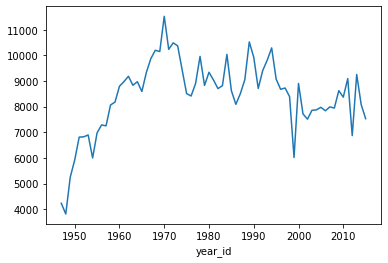

In [106]:
# This shows a line plot with several peaks and two notable valleys around the years 2000 
# and 2010:

# We add ; at the end to get rid of the weird text on top

nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot();

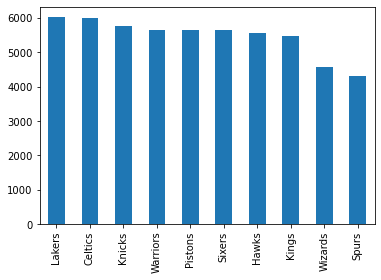

In [107]:
# You can also create other types of plots, like a bar plot:

nba["fran_id"].value_counts().head(10).plot(kind="bar");

* The Lakers are leading the Celtics by a minimal edge, and there are six further teams with a game count above 5000.

* Now try a more complicated exercise. In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season. Then, expand the code block to see a solution:

* First, you define a criteria to include only the Heat’s games from 2013. Then, you create a plot in the same way as you’ve seen above:

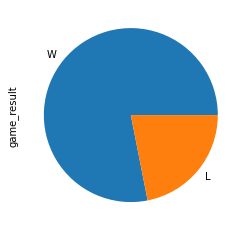

In [108]:
# Here’s what a champion pie looks like:

nba[
(nba["fran_id"] == "Heat") &
(nba["year_id"] == 2013)
]["game_result"].value_counts().plot(kind="pie");

* Sometimes, the numbers speak for themselves, but often a chart helps a lot with communicating your insights. To learn more about visualizing your data, check out [Interactive Data Visualization in Python With Bokeh](https://realpython.com/python-data-visualization-bokeh/).

### Conclusion
* In this tutorial, you’ve learned how to start exploring a dataset with the Pandas Python library. You saw how you could access specific rows and columns to tame even the largest of datasets. Speaking of taming, you’ve also seen multiple techniques to prepare and clean your data, by specifying the data type of columns, dealing with missing values, and more. You’ve even created queries, aggregations, and plots based on those.

* Now you can:

    * Work with Series and DataFrame objects
    * Subset your data with .loc, .iloc, and the indexing operator
    * Answer questions with queries, grouping, and aggregation
    * Handle missing, invalid, and inconsistent data
    * Visualize your dataset in a Jupyter notebook
* This journey using the NBA stats only scratches the surface of what you can do with the Pandas Python library. You can power up your project with Pandas tricks, learn techniques to speed up Pandas in Python, and even dive deep to see how Pandas works behind the scenes. There are many more features for you to discover, so get out there and tackle those datasets!

**Louai Al Jabi**


In [7]:
dict = {"key1":5,"key2":4}
dict["key2"]

4

In [ ]:
df['ColumnA'] = df[df.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(datetime)),axis=1)